In [1]:
import matplotlib.pyplot as plt
import numpy as np

from matplotlib.pyplot import figure

In [2]:
import sys
from pathlib import Path

module_path = str(Path.cwd().parents[0])
if module_path not in sys.path:
    sys.path.append(module_path)

from msfiltration.MCF import MCF

In [3]:
root_fig = '/home/tc/OneDrive/Software/MSFiltration/figures/'

In [4]:
plt.rcParams.update({'font.size': 20})

# Example from paper

In [5]:
community_ids = [[1,2,3],[1,1,2],[1,2,2],[1,2,1],[1,1,1]]

In [6]:
# initialise MSF object
mcf = MCF()

mcf.partitions = community_ids
mcf.filtration_indices = [1,2,3,4,5]
mcf.n_partitions = 5

In [7]:
mcf.build_filtration()

Building filtration ...


100%|██████████| 5/5 [00:00<00:00, 5086.47it/s]


In [8]:
mcf.compute_persistence()

Computing persistence ... 


In [9]:
mcf.persistence

[(1, (4.0, 5.0)), (0, (1.0, inf)), (0, (1.0, 3.0)), (0, (1.0, 2.0))]

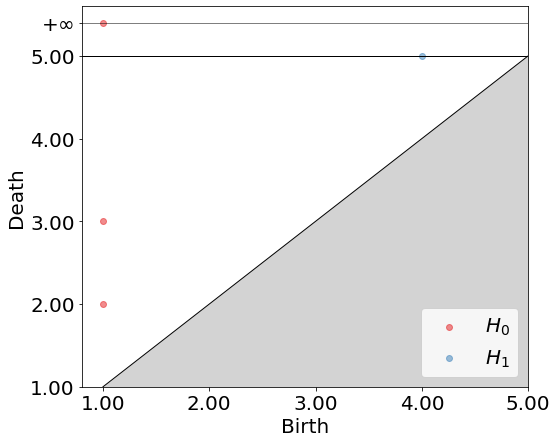

In [10]:
# Plot persistence diagram
ax = mcf.plot_persistence_diagram()
plt.savefig(root_fig +'Paper_Example_PD.pdf', bbox_inches='tight')

# Repeat with Julia

In [11]:
mcf.build_filtration(method="eirene")

Building filtration ...


In [ ]:
mcf.compute_persistence(method="eirene")

In [ ]:
mcf.plot_persistence_diagram()

# Analyse hierarchy of partitions using $\beta_0$

In [ ]:
from msfiltration.msf_properties import compute_rank, compute_beta_0

In [ ]:
rank = compute_rank(msf)
beta_0 = compute_beta_0(msf)

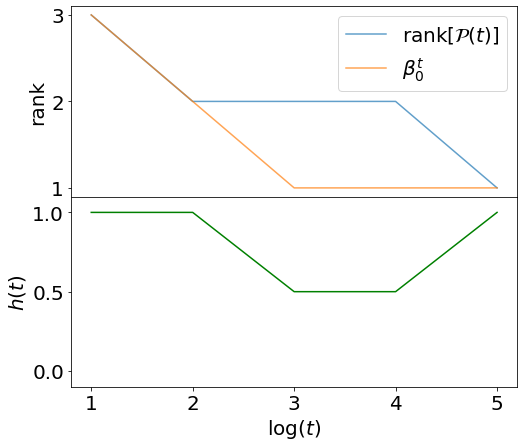

In [ ]:
fig, axs = plt.subplots(2, figsize=(8, 7))
fig.subplots_adjust(hspace=0.0, wspace=0.3)
ax1 = axs[0]
ax2 = axs[1]
ax1.plot(msf.log_scales,rank, label = r'rank$[\mathcal{P}(t)]$',alpha=0.7)#,ls=':')
ax1.plot(msf.log_scales,beta_0[:-1], label = r'$\beta_0^t$',alpha=0.7)#,ls=':')
ax1.set(xticks=[],ylabel=r'rank')

ax1.legend()

ax2.plot(msf.log_scales,beta_0[:-1]/rank, label = r'$h(t)$',c='green')
ax2.set_ylabel(r'$h(t)$')#, color="green")
ax2.set(xlabel=r'$\log(t)$',ylim=(-0.1,1.1))
plt.savefig(root_fig +'Paper_Example_persistence_hierarchy.pdf', dpi=fig.dpi,bbox_inches='tight')